# Vsini tutorial

In [1]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import hpfspec
import numpy as np
from hpfspec import utils, spec_help
utils
#sys.path.pop(0)

AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False


<module 'hpfspec.hpfspec.utils' from '/Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/utils.py'>

In [3]:
# Target
H1 = hpfspec.HPFSpectrum("../hpfspec/data/hpf/spectra/G_9-40/Slope-20190301T024821_R01.optimal.fits",ccf_redshift=True)
H2 = hpfspec.HPFSpectrum("../hpfspec/data/hpf/spectra/GJ_699/Slope-20181003T014556_R01.optimal.fits",ccf_redshift=True)
H3 = hpfspec.HPFSpectrum("../hpfspec/data/hpf/spectra/G_227-22/Slope-20180919T015627_R01.optimal.fits",ccf_redshift=True)

Reading from file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/G_9-40.config
could not convert string to float: 'None' File does not exist!
Querying SIMBAD for data
Saving to file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/G_9-40.config
ra 134.71804124999997
dec 21.07616722222222
pmra 175.512
pmdec -318.469
px 35.7781
rv None
epoch 2451545.0
Done
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 14.33333km/s
Second iteration: RVabs = 14.48107km/s, sigma=2.82531
RVabs it #1: 14.33333+- 0.00000km/s
RVabs it #2: 14.48107+- 0.00000km/s
berv=-13.85248087461531,rv=14.481066304034018
Reading from file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/GJ_699.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -110.50000km/s
Second iteration: RVabs = -110.59251km/s, sigma=3.01015
RVabs it #1: -110.50000+- 0.0000

(8860.0, 8870.0)

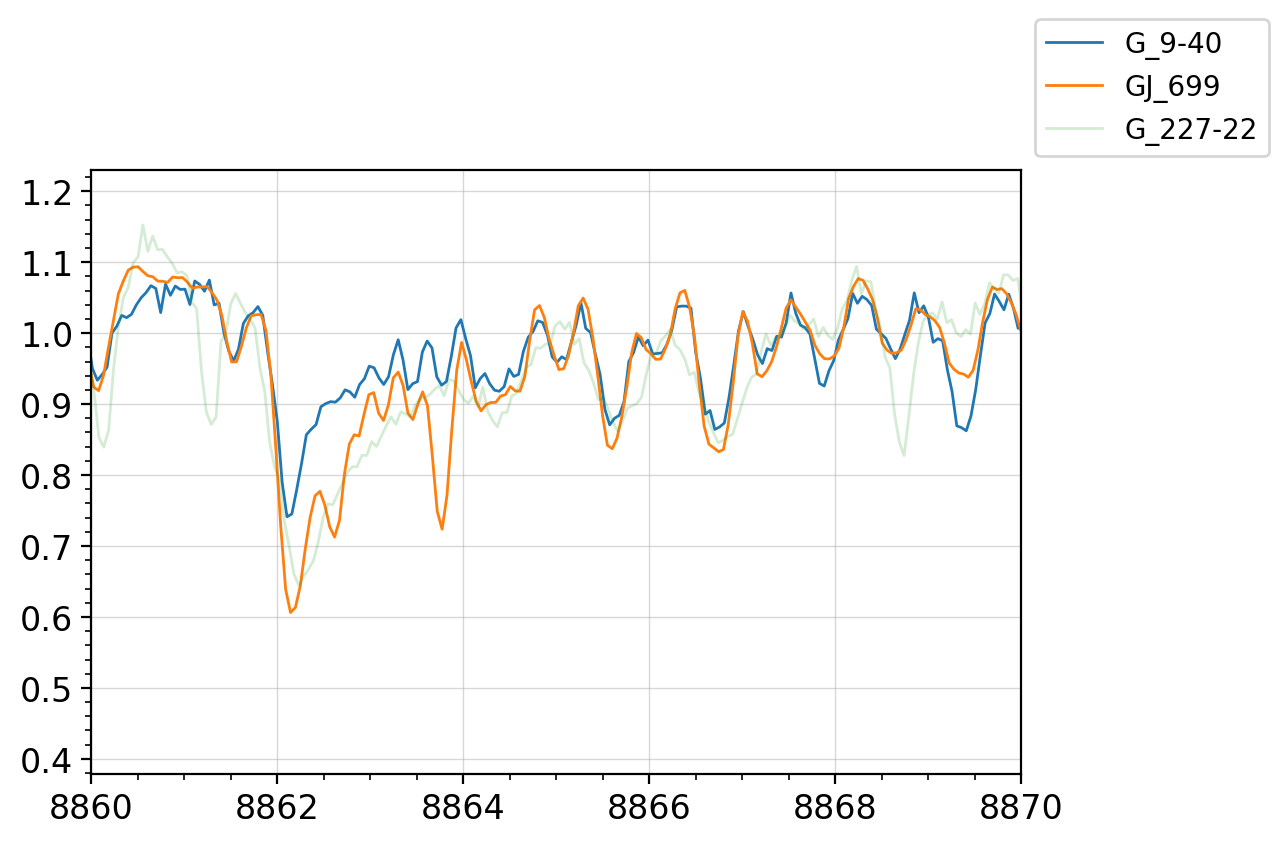

In [4]:
# Lets overplot both of them and see that they line up
# Lets take a look at the TiO bandhead at ~8860A
# VB-10 is definitely broader (and much later spectral type)
fig, ax = plt.subplots(dpi=200)
o = 6
ax.plot(H1.w_shifted[o],H1.f_debl[o],lw=1,label=H1.object)
ax.plot(H2.w_shifted[o],H2.f_debl[o],lw=1,label=H2.object)
ax.plot(H3.w_shifted[o],H3.f_debl[o],lw=1,alpha=0.2,label=H3.object)
utils.ax_apply_settings(ax)
ax.legend(bbox_to_anchor=(1.,1.))
ax.set_xlim(8860,8870)

AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False


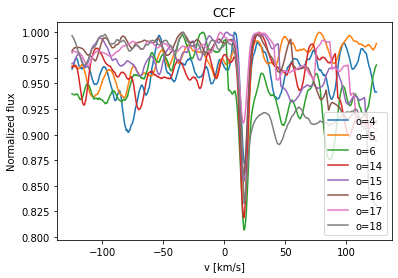

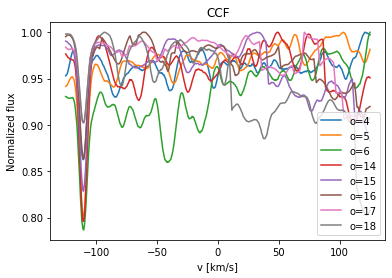

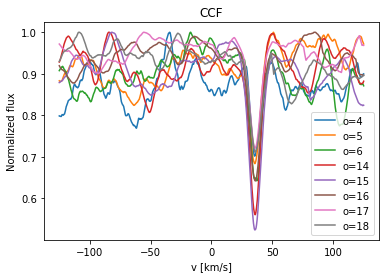

In [5]:
# Lets take a look at CCFs
v = np.linspace(-125.,125.,1501)
orders = [4,5,6,14,15,16,17,18]
CCF1 = H1.calculate_ccf_for_orders(v,orders=orders,plot=True)
CCF2 = H2.calculate_ccf_for_orders(v,orders=orders,plot=True)
CCF3 = H3.calculate_ccf_for_orders(v,orders=orders,plot=True)

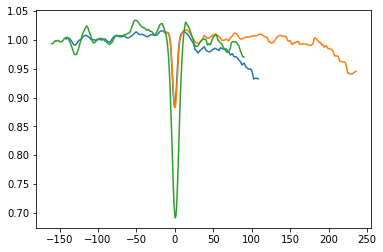

In [6]:
fig, ax = plt.subplots()
ax.plot(v-H1.rv,CCF1[28]/np.median(CCF1[28]))
ax.plot(v-H2.rv,CCF2[28]/np.median(CCF2[28]))
ax.plot(v-H3.rv,CCF3[28]/np.median(CCF3[28]))

# Vsini 

Reading from file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/VB_10.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 35.66667km/s
Second iteration: RVabs = 35.26532km/s, sigma=4.32615
RVabs it #1: 35.66667+- 0.00000km/s
RVabs it #2: 35.26532+- 0.00000km/s
berv=13.684245296677743,rv=35.26532288323483
Reading from file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/GJ_699.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -110.50000km/s
Second iteration: RVabs = -110.56918km/s, sigma=3.00271
RVabs it #1: -110.50000+- 0.00000km/s
RVabs it #2: -110.56918+- 0.00000km/s
berv=-25.989653949932144,rv=-110.56917930101818
2.474904221608289 9.104251378363038 [2.95477882]
o=4, vsini= 5.766998812245595km/s
2.86770420059019 13.390504033023419 [4.28952164]
o=5, vsini= 8.318996200752963km/s
2.828333306716286 10.207806565299947 [4.01273651

(8.1257886839652, 1.0103728698449905)

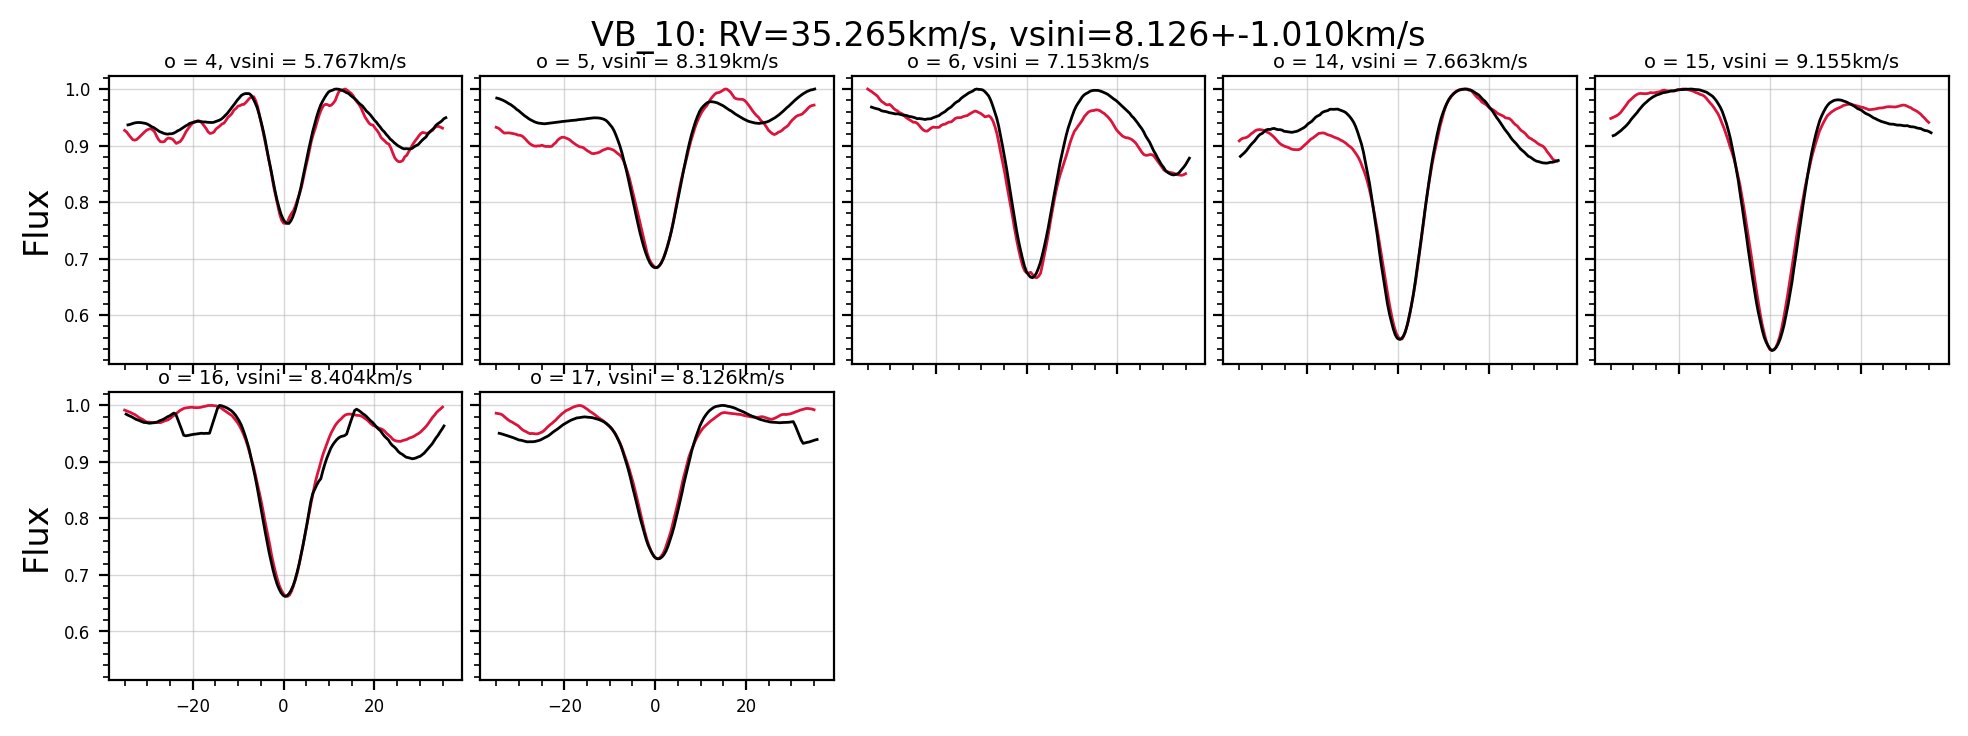

In [7]:
#ftarg = "../data/hpf/spectra/GJ_273/Slope-20180302T021512_R01.optimal.fits"
ftarg = "../hpfspec/data/hpf/spectra/VB_10/Slope-20190612T065809_R01.optimal.fits"
fcal = "../hpfspec/data/hpf/spectra/GJ_699/Slope-20181003T013939_R01.optimal.fits"
spec_help.vsini_from_hpf_spectra(ftarg,fcal,plot=True)

Defaulting to fixed wavelength
Reading from file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/GJ_273.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 16.66667km/s
Second iteration: RVabs = 16.51038km/s, sigma=2.84991
RVabs it #1: 16.66667+- 0.00000km/s
RVabs it #2: 16.51038+- 0.00000km/s
berv=-21.14122825758546,rv=16.510382042801655
Reading from file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/GJ_699.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -110.50000km/s
Second iteration: RVabs = -110.56918km/s, sigma=3.00271
RVabs it #1: -110.50000+- 0.00000km/s
RVabs it #2: -110.56918+- 0.00000km/s
berv=-25.989653949932144,rv=-110.56917930101818
2.474904221608289 9.104251378363038 [2.44930646]
A value in x_new is below the interpolation range.
Setting v1=0
o=4, vsini= 0.0km/s
2.86770420059019 13.390504033023419 [2.68876686]

(0.0, 0.8355352461716052)

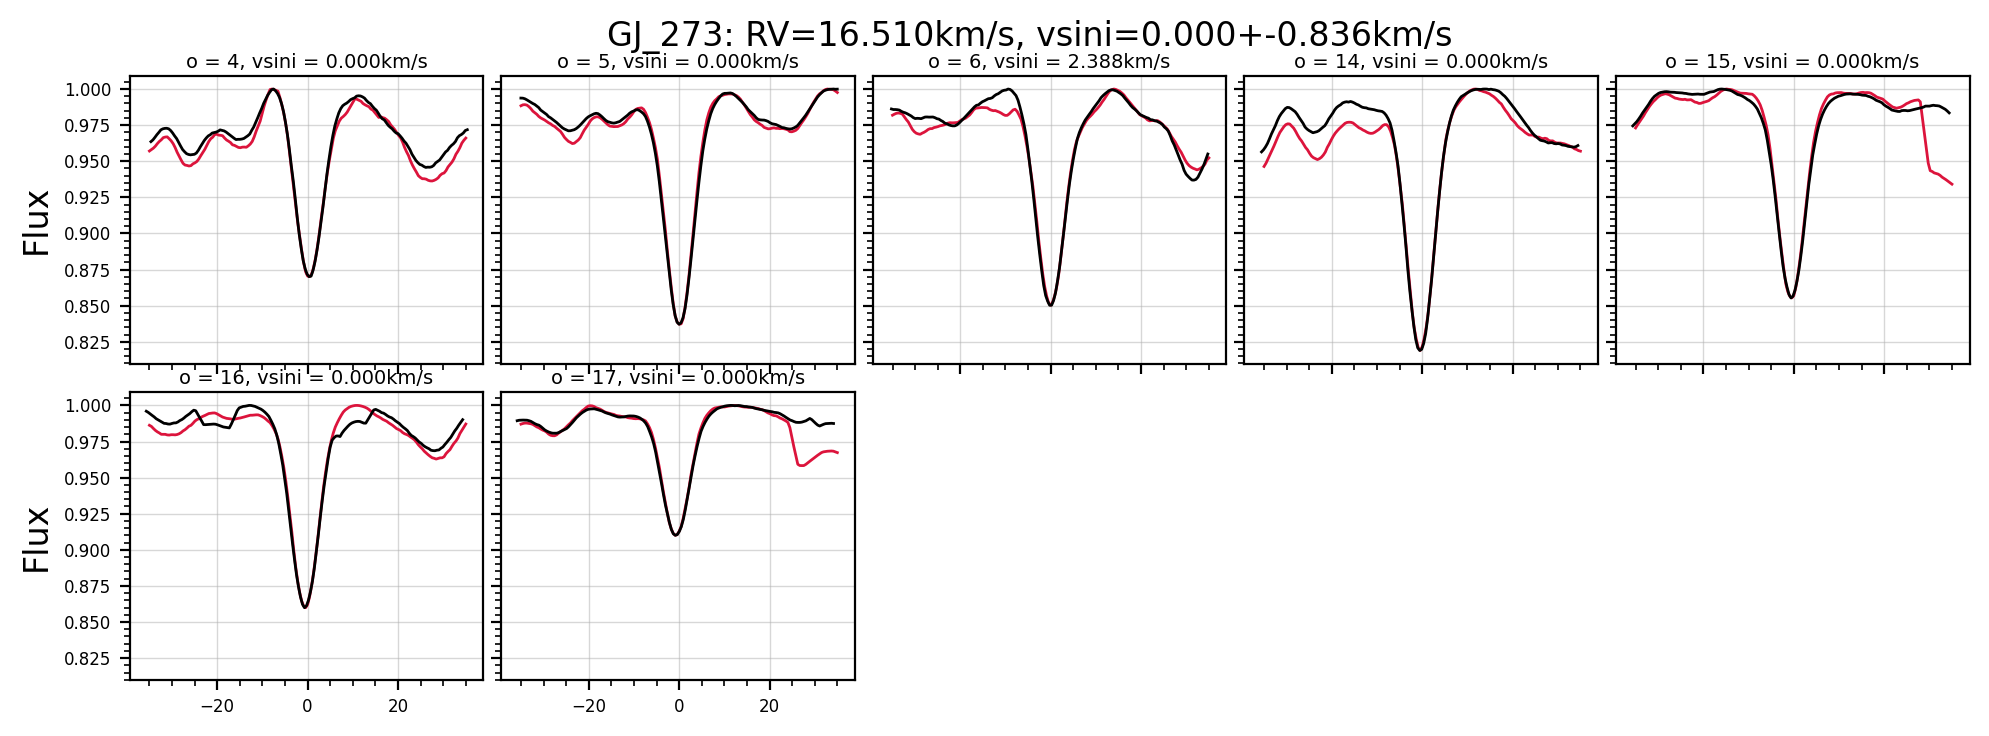

In [8]:
ftarg = "../hpfspec/data/hpf/spectra/GJ_273/Slope-20180302T021512_R01.optimal.fits"
fcal = "../hpfspec/data/hpf/spectra/GJ_699/Slope-20181003T013939_R01.optimal.fits"
spec_help.vsini_from_hpf_spectra(ftarg,fcal,plot=True)